In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S3/Office_Amelie-S3.csv",index_col='timestamp')

In [21]:
len(df)

6480

In [22]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [23]:
len(train_data),len(test_data)

(5760, 720)

In [24]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [25]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [26]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [27]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [28]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
#X_train = np.reshape(X_train, (8016, seq_len, 1))
#X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [29]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (5736, 24)
y_train.shape =  (5736,)
X_test.shape =  (696, 24)
y_test.shape =  (696,)


In [30]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [31]:
input_layer = Input(shape=24, dtype='float32')
dense1 = Dense(24, activation='linear')(input_layer)
dense2 = Dense(18, activation='linear')(dense1)
dense3 = Dense(18, activation='linear')(dense2)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 18)                450       
                                                                 
 dropout_1 (Dropout)         (None, 18)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,069
Trainable params: 1,069
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=300)

Epoch 1/300
45/45 [==============================] - 0s 2ms/step - loss: 646.0049
Epoch 2/300
45/45 [==============================] - 0s 2ms/step - loss: 217.4517
Epoch 3/300
45/45 [==============================] - 0s 2ms/step - loss: 150.1056
Epoch 4/300
45/45 [==============================] - 0s 2ms/step - loss: 115.3306
Epoch 5/300
45/45 [==============================] - 0s 2ms/step - loss: 99.5511
Epoch 6/300
45/45 [==============================] - 0s 2ms/step - loss: 88.9336
Epoch 7/300
45/45 [==============================] - 0s 2ms/step - loss: 81.9829
Epoch 8/300
45/45 [==============================] - 0s 2ms/step - loss: 75.9482
Epoch 9/300
45/45 [==============================] - 0s 2ms/step - loss: 71.6055
Epoch 10/300
45/45 [==============================] - 0s 2ms/step - loss: 68.9525
Epoch 11/300
45/45 [==============================] - 0s 2ms/step - loss: 65.9721
Epoch 12/300
45/45 [==============================] - 0s 2ms/step - loss: 61.1986
Epoch 13/300
45/45 [=

In [33]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [35]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [36]:
print('Root Mean Squared Error for ANN Model for training is:',rmse_train)
print('Root Mean Squared Error for ANN Model for testing is:',rmse_test)
print('Mean Absolute Error for ANN Model for training is:',mae_train)
print('Mean Absolute Error for ANN Model for testing is:',mae_test)
print('MAPE for ANN Model for training is:',mape_train)
print('MAPE for ANN Model for testing is:',mape_test)

Root Mean Squared Error for ANN Model for training is: 5.186147679116139
Root Mean Squared Error for ANN Model for testing is: 6.540871748378903
Mean Absolute Error for ANN Model for training is: 3.0042631459618545
Mean Absolute Error for ANN Model for testing is: 3.692619717477382
MAPE for ANN Model for training is: 0.13836151363626162
MAPE for ANN Model for testing is: 0.12109414123671292


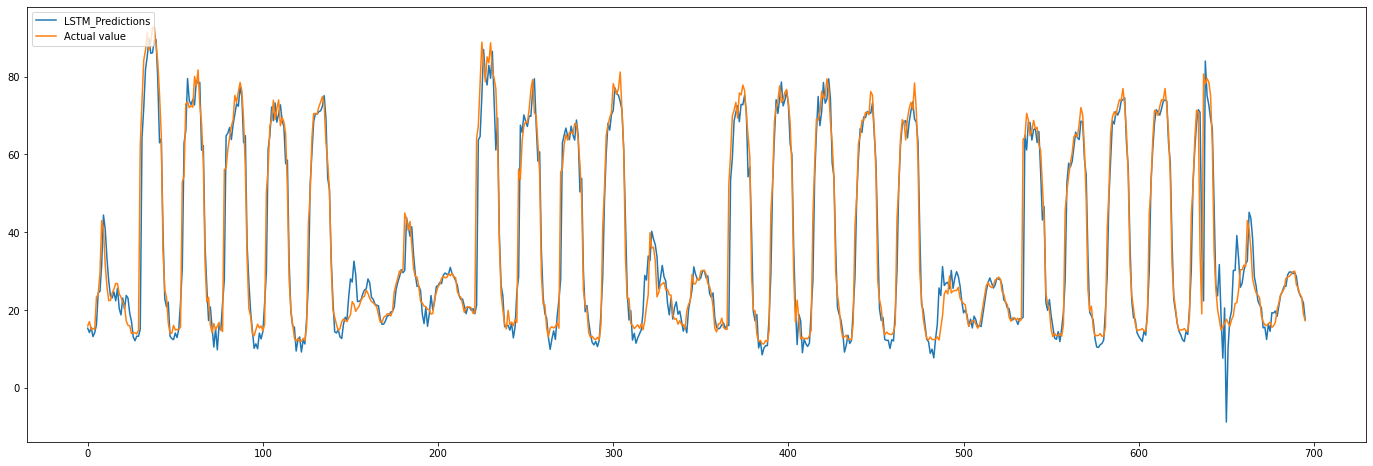

In [37]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [38]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([16.01]), array([15.407825], dtype=float32))

In [39]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.60217453]), array([2.82864414]), array([-0.54793209]), array([2.10674725]), array([0.81621105]), array([7.11461441]), array([-0.4790947]), array([4.77460373]), array([11.23960617]), array([-3.61173645]), array([-9.06256653]), array([-7.27306076]), array([-5.05080368]), array([-1.12725967]), array([1.29844543]), array([0.75386734]), array([4.45499649]), array([1.19167313]), array([3.79449127]), array([4.55977356]), array([-1.08066696]), array([0.79610626]), array([-6.52444717]), array([-6.99446045]), array([-3.20362091]), array([-3.14675735]), array([1.15798027]), array([2.02715488]), array([0.59174198]), array([1.56145538]), array([47.1314333]), array([9.4518808]), array([12.17704315]), array([4.95027832]), array([6.00702118]), array([-2.93623322]), array([2.83959229]), array([6.46095184]), array([3.54147034]), array([-1.32400116]), array([4.44979004]), array([12.4489798]), array([0.97280121]), array([-4.67586548]), array([2.27850647]), array([2.39527298]), array([-5.38486053

In [40]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([58.26315109]), array([-35.83686066]))

In [41]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [42]:
len(neg),len(pos)

(307, 389)